In [1]:
import pandas as pd
import numpy as np

# Définir les données features-ID = -1 dataset = CIFAR-1O
CIFAR_10 = {
    'Méthode': ['GRAM', 'MLS', 'ODIN', 'DKNN',  'VIM', 'Energy', 'Entropy', 'Mahalanobis', 'Kmeans', 'PCA_KNN', 'PCA_Mahalanbois', 'NMF_KNN', 'NMF_Mahalanobis_neg', 'PCA_per_class', 'NMF_per_class', 'PCA_per_class_mahalanobis', 'NMF_per_class_mahalanobis_neg' ],
    'Cifar100 (AUROC)': [0.727480, 0.814380, 0.569511, 0.856488, 0.792277, 0.817378, 0.825382, 0.829511, 0.844469, 0.856014,  0.555611   , 0.559492   , 0.866050  , 0.857047 ,0.616399  , 0.839214  , 0.888650   ],  # Génération de données aléatoires
    'Cifar100 (FPR@TPR95)': [0.892000, 0.778400, 0.944400, 0.459300, 0.584000, 0.772500, 0.653600, 0.601200, 0.501200 , 0.472400, 0.717600,  0.942100,  0.396000  , 0.471200  ,0.935700 , 0.531600  ,0.329200   ],
    'Tin (AUROC)': [0.747407, 0.832415 , 0.551965 , 0.865608 ,0.785109, 0.833931, 0.834622, 0.833662, 0.851129, 0.864752, 0.587608, 0.511227, 0.931338, 0.864477, 0.615037, 0.855309,  0.891742,  ],
    'Tin (FPR@TPR95)': [0.876400, 0.739200, 0.956200 , 0.473200, 0.612800, 0.731200 ,0.619200, 0.587600, 0.497600, 0.477200, 0.736900, 0.972400, 0.203600, 0.476000, 0.933200, 0.505700, 0.390800,  ],
    'Texture (AUROC)': [0.754853, 0.835893 , 0.625239, 0.885332 , 0.825398, 0.836868, 0.832491, 0.876842, 0.874654, 0.892550, 0.587393, 0.759062, 0.867252, 0.891941, 0.740129, 0.873982, 0.800687,  ],
    'Texture (FPR@TPR95)': [0.853800,0.681500, 0.954200, 0.350700, 0.467400, 0.686600,  0.553800,  0.437000, 0.375400, 0.335400, 0.704600, 0.787500, 0.998400, 0.347400, 0.833400, 0.398600, 1.000000  ],
    'SVHN (AUROC)': [0.582863, 0.871423, 0.758292,  0.839994, 0.734864, 0.873560, 0.838532, 0.872129, 0.814572, 0.850353, 0.561921, 0.778483, 0.325345, 0.856215, 0.730751, 0.799854,  0.672970,  ], # NMF_per_class_mahalanobis non negative
    'SVHN (FPR@TPR95)': [0.938100, 0.298900, 0.681800, 0.318600, 0.484900, 0.295100, 0.316600, 0.288500, 0.406600, 0.343000, 0.669000, 0.647000, 0.995900, 0.335600, 0.634100, 0.448200, 0.809400,   ], # NMF_per_class_mahalanobis non negative
    'Places365 (AUROC)': [0.582863, 0.875806, 0.619343, 0.900349, 0.805477, 0.877872, 0.863064, 0.872141, 0.874400, 0.898461, 0.572439, 0.615557, 0.946892, 0.898133, 0.712276,  0.895382, 0.939130,  ],
    'Places365 (FPR@TPR95)': [0.938100, 0.554500, 0.924900, 0.370100, 0.530500, 0.566900, 0.477300, 0.492900, 0.427400, 0.377300, 0.764800, 0.950100, 0.165300, 0.377300, 0.857500,  0.388100, 0.211100 ]
}

# Création du DataFrame
CIFAR_10 = pd.DataFrame(CIFAR_10)

# Affichage du DataFrame
print(CIFAR_10)

                          Méthode  Cifar100 (AUROC)  Cifar100 (FPR@TPR95)  \
0                            GRAM          0.727480                0.8920   
1                             MLS          0.814380                0.7784   
2                            ODIN          0.569511                0.9444   
3                            DKNN          0.856488                0.4593   
4                             VIM          0.792277                0.5840   
5                          Energy          0.817378                0.7725   
6                         Entropy          0.825382                0.6536   
7                     Mahalanobis          0.829511                0.6012   
8                          Kmeans          0.844469                0.5012   
9                         PCA_KNN          0.856014                0.4724   
10                PCA_Mahalanbois          0.555611                0.7176   
11                        NMF_KNN          0.559492                0.9421   

In [2]:
CIFAR_10

,Méthode,Cifar100 (AUROC),Cifar100 (FPR@TPR95),Tin (AUROC),Tin (FPR@TPR95),Texture (AUROC),Texture (FPR@TPR95),SVHN (AUROC),SVHN (FPR@TPR95),Places365 (AUROC),Places365 (FPR@TPR95)
0,GRAM,0.727480,0.8920,0.747407,0.8764,0.754853,0.8538,0.582863,0.9381,0.582863,0.9381
1,MLS,0.814380,0.7784,0.832415,0.7392,0.835893,0.6815,0.871423,0.2989,0.875806,0.5545
2,ODIN,0.569511,0.9444,0.551965,0.9562,0.625239,0.9542,0.758292,0.6818,0.619343,0.9249
3,DKNN,0.856488,0.4593,0.865608,0.4732,0.885332,0.3507,0.839994,0.3186,0.900349,0.3701
4,VIM,0.792277,0.5840,0.785109,0.6128,0.825398,0.4674,0.734864,0.4849,0.805477,0.5305
5,Energy,0.817378,0.7725,0.833931,0.7312,0.836868,0.6866,0.873560,0.2951,0.877872,0.5669
6,Entropy,0.825382,0.6536,0.834622,0.6192,0.832491,0.5538,0.838532,0.3166,0.863064,0.4773
7,Mahalanobis,0.829511,0.6012,0.833662,0.5876,0.876842,0.4370,0.872129,0.2885,0.872141,0.4929
8,Kmeans,0.844469,0.5012,0.851129,0.4976,0.874654,0.3754,0.814572,0.4066,0.874400,0.4274
9,PCA_KNN,0.856014,0.4724,0.864752,0.4772,0.892550,0.3354,0.850353,0.3430,0.898461,0.3773


/tmp/ipykernel_2111689/2432493913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
/tmp/ipykernel_2111689/2432493913.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['Méthode'], rotation=90)
/tmp/ipykernel_2111689/2432493913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
/tmp/ipykernel_2111689/2432493913.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(

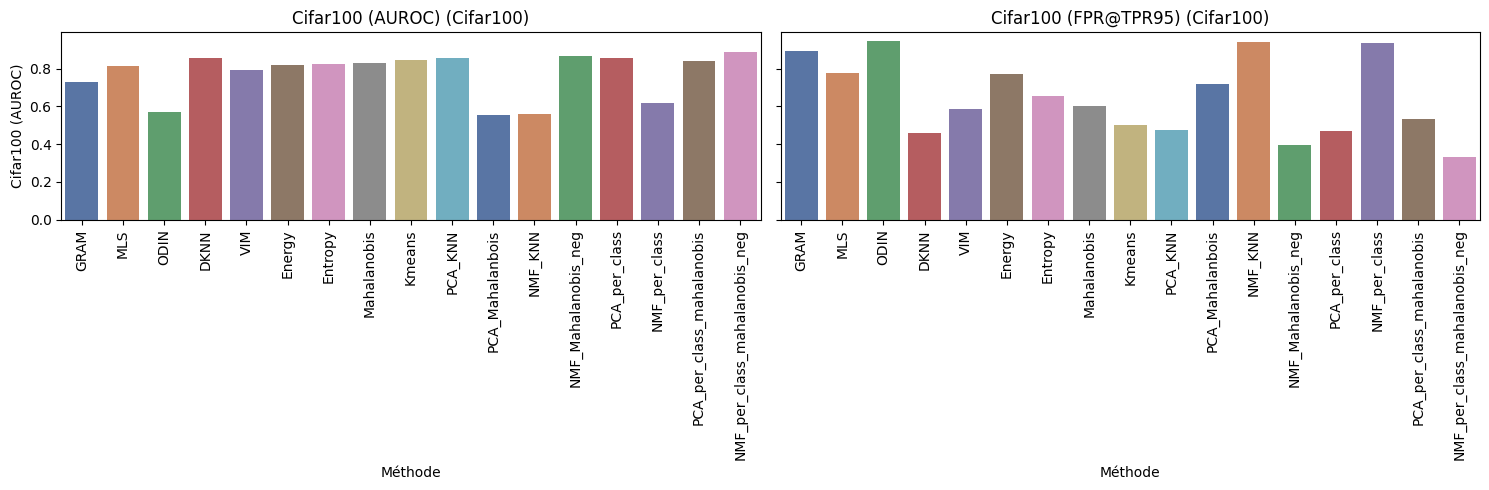

/tmp/ipykernel_2111689/2432493913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
/tmp/ipykernel_2111689/2432493913.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['Méthode'], rotation=90)
/tmp/ipykernel_2111689/2432493913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
/tmp/ipykernel_2111689/2432493913.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(

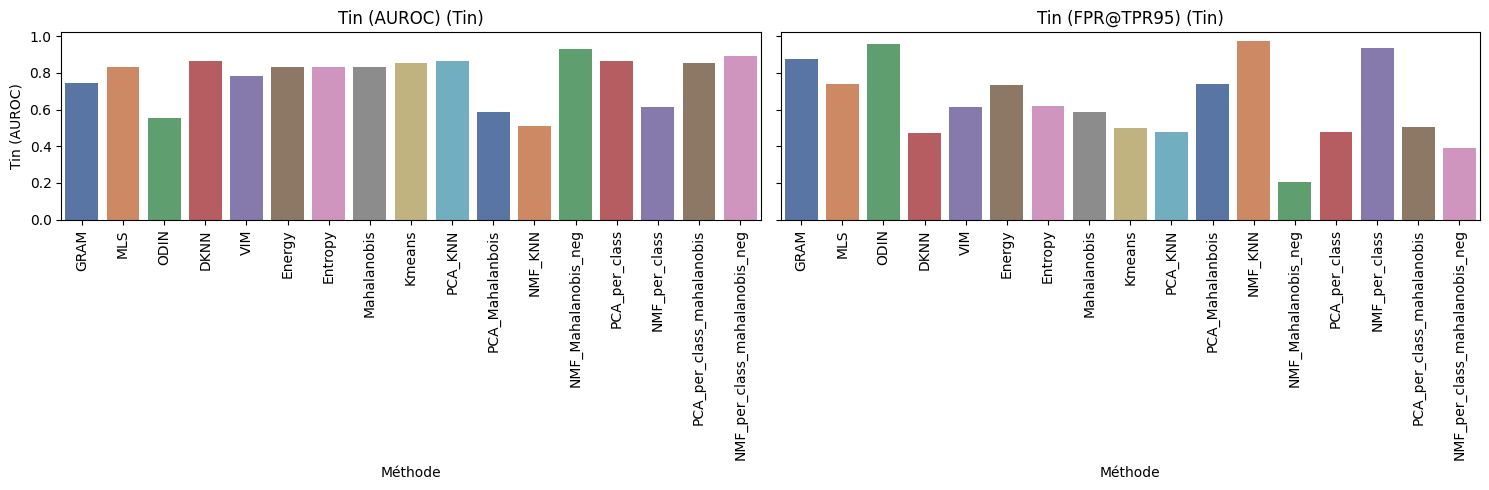

/tmp/ipykernel_2111689/2432493913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
/tmp/ipykernel_2111689/2432493913.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['Méthode'], rotation=90)
/tmp/ipykernel_2111689/2432493913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
/tmp/ipykernel_2111689/2432493913.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(

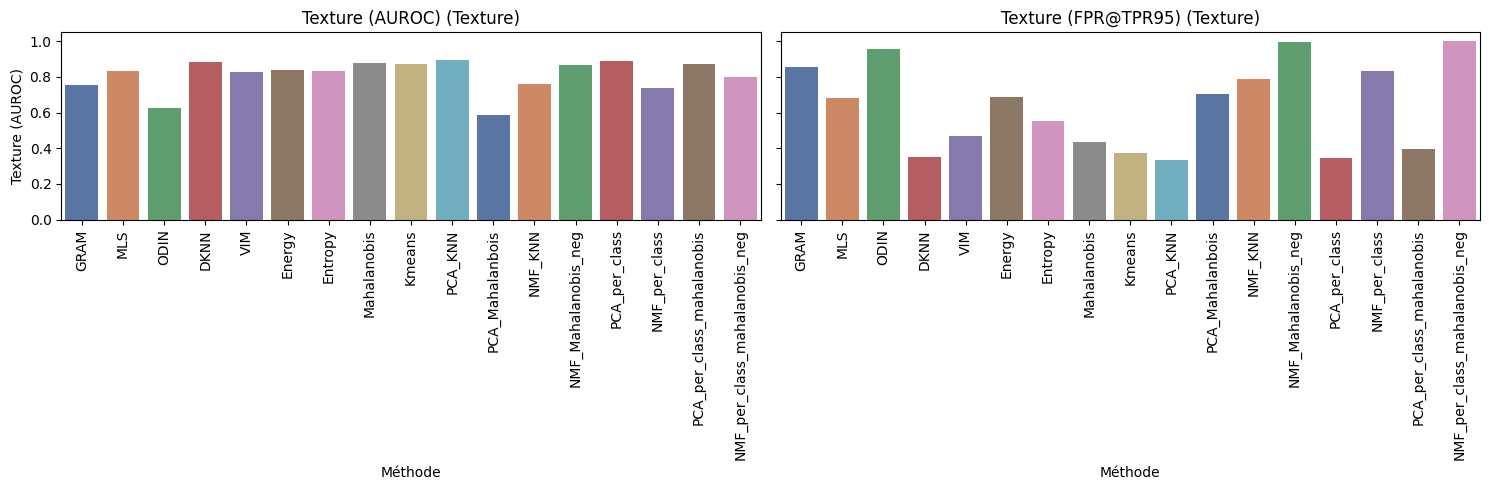

/tmp/ipykernel_2111689/2432493913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
/tmp/ipykernel_2111689/2432493913.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['Méthode'], rotation=90)
/tmp/ipykernel_2111689/2432493913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
/tmp/ipykernel_2111689/2432493913.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(

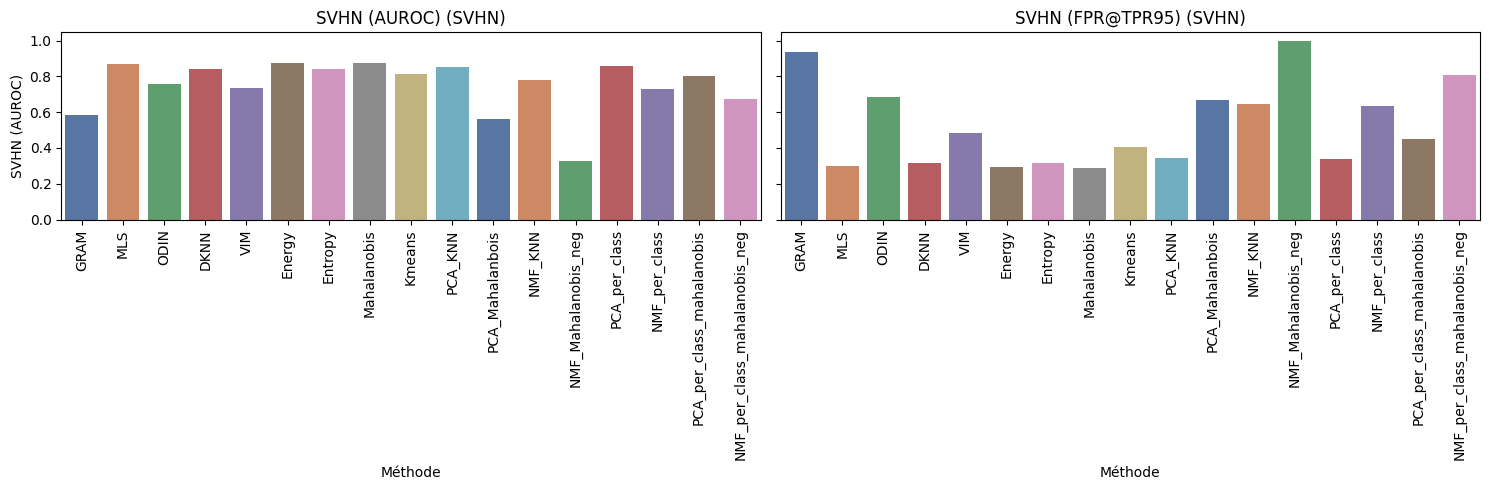

/tmp/ipykernel_2111689/2432493913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
/tmp/ipykernel_2111689/2432493913.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['Méthode'], rotation=90)
/tmp/ipykernel_2111689/2432493913.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
/tmp/ipykernel_2111689/2432493913.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(

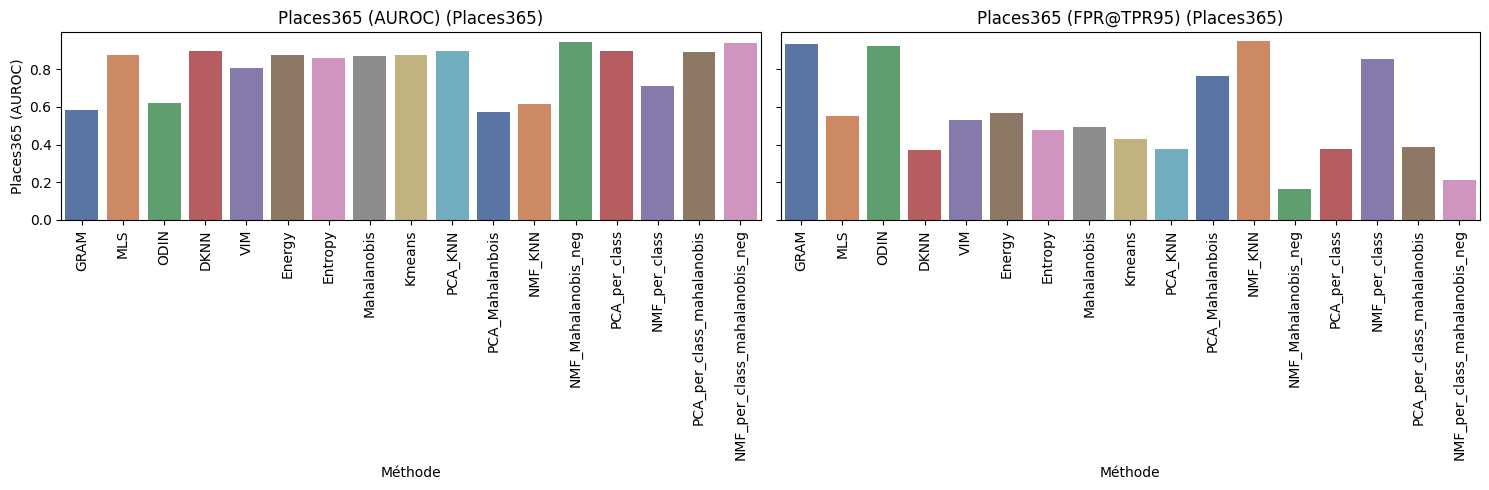

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Données de CIFAR_10 à partir de l'exemple précédent

# Définir une palette de couleurs
colors = sns.color_palette("deep", len(CIFAR_10['Méthode'].unique()))

# Fonction pour tracer des graphiques à barres avec des couleurs personnalisées
def plot_benchmark_with_colors(data, metrics, title_suffix=''):
    num_metrics = len(metrics)
    fig, axes = plt.subplots(1, num_metrics, figsize=(15, 5), sharey=True)
    if num_metrics == 1:
        axes = [axes]  # Pour le rendre itérable
    
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=data, x='Méthode', y=metric, ax=ax, palette=colors)
        ax.set_xticklabels(data['Méthode'], rotation=90)
        ax.set_title(f'{metric} {title_suffix}')
        ax.set_ylabel(metric)
        ax.set_xlabel('Méthode')
    
    plt.tight_layout()
    plt.show()

# Préparer les données pour les graphiques à barres
metrics = ['Cifar100 (AUROC)', 'Cifar100 (FPR@TPR95)', 'Tin (AUROC)', 'Tin (FPR@TPR95)', 'Texture (AUROC)', 'Texture (FPR@TPR95)', 'SVHN (AUROC)', 'SVHN (FPR@TPR95)', 'Places365 (AUROC)', 'Places365 (FPR@TPR95)']

# Visualiser les graphiques à barres avec des couleurs personnalisées pour chaque métrique de dataset
plot_benchmark_with_colors(CIFAR_10, metrics[:2], title_suffix='(Cifar100)')
plot_benchmark_with_colors(CIFAR_10, metrics[2:4], title_suffix='(Tin)')
plot_benchmark_with_colors(CIFAR_10, metrics[4:6], title_suffix='(Texture)')
plot_benchmark_with_colors(CIFAR_10, metrics[6:8], title_suffix='(SVHN)')
plot_benchmark_with_colors(CIFAR_10, metrics[8:], title_suffix='(Places365)')


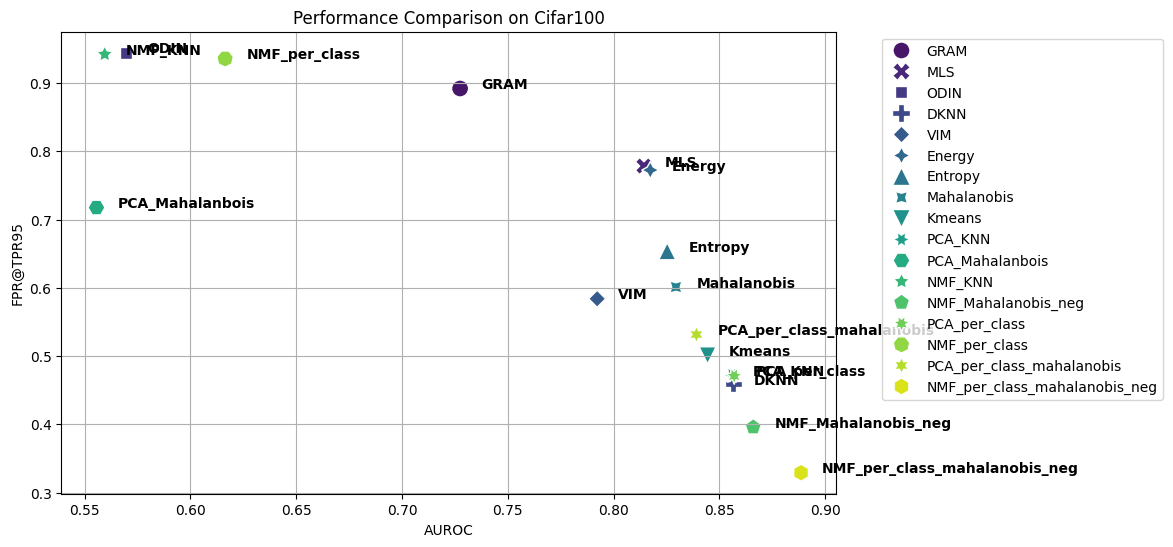

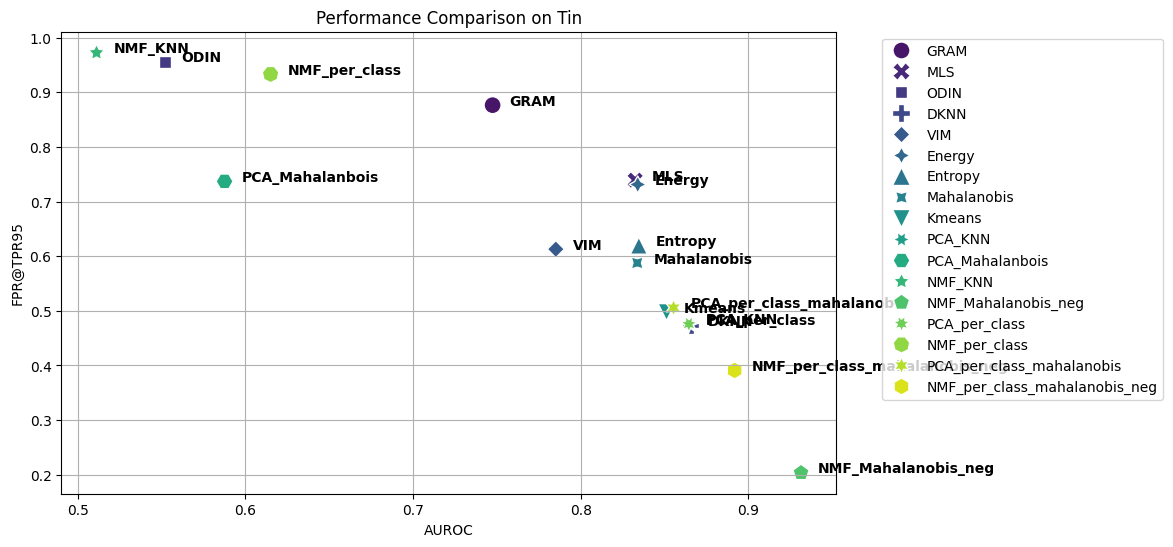

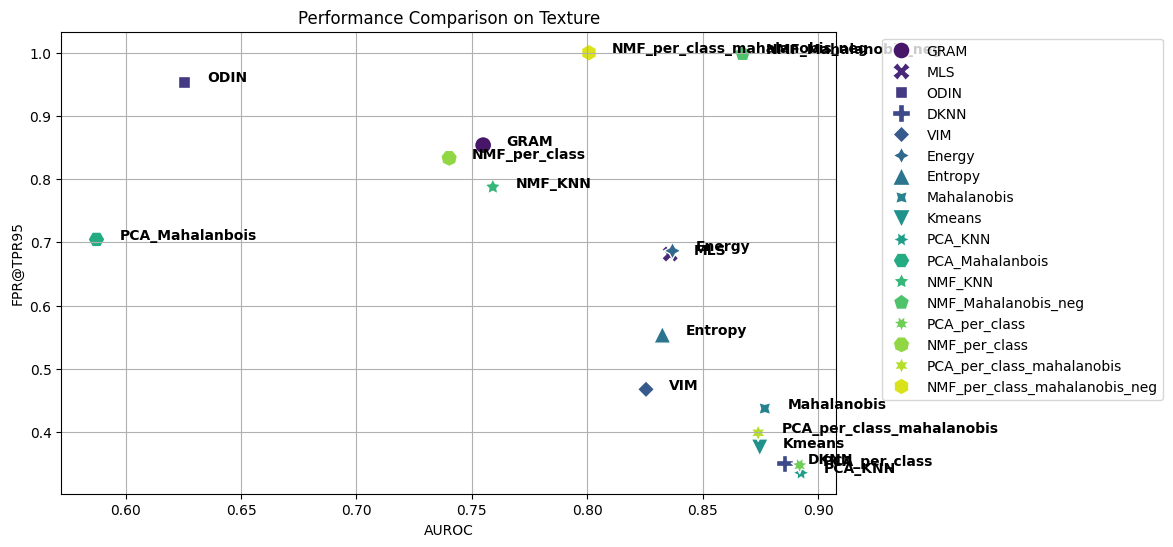

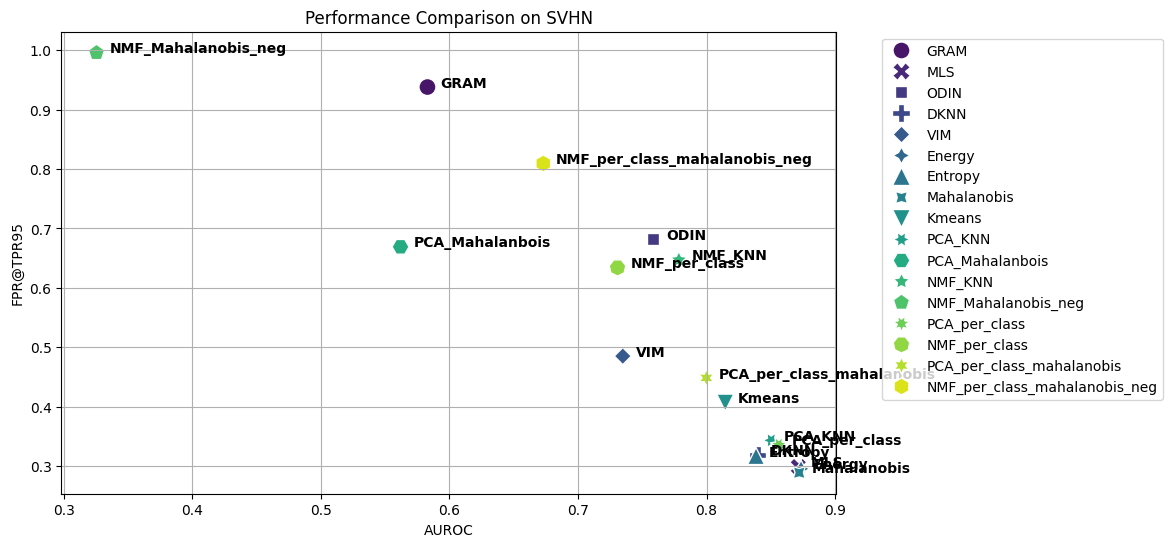

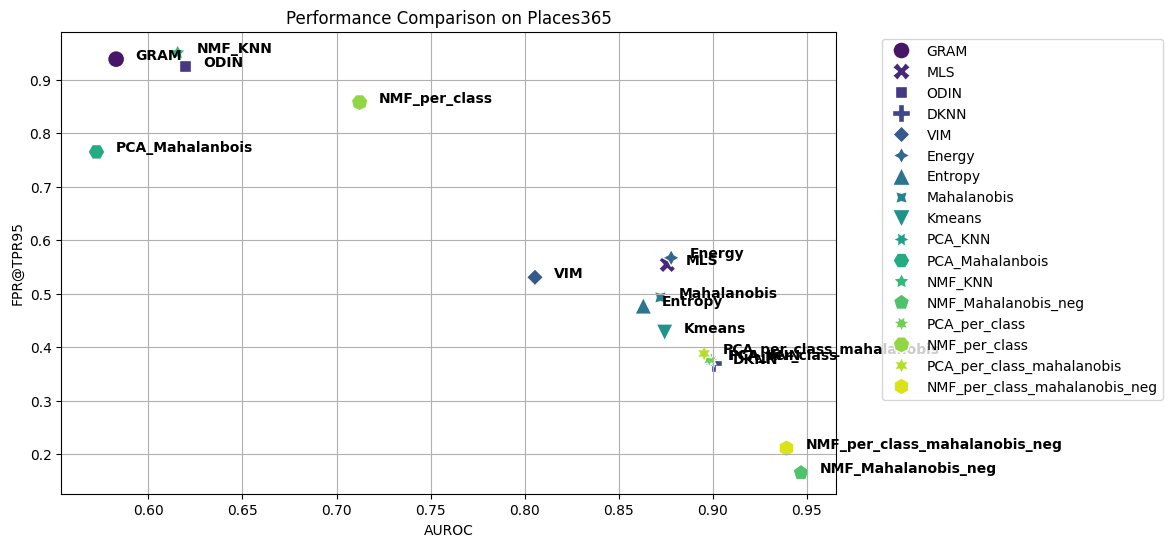

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supposons que CIFAR_10 est déjà chargé et préparé avec vos données

def plot_scatter(data, auroc_col, fpr_col, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=auroc_col, y=fpr_col, hue='Méthode', style='Méthode', s=150, palette='viridis')
    plt.title(title)
    plt.xlabel('AUROC')
    plt.ylabel('FPR@TPR95')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # # Ajouter des annotations pour chaque point
    for line in range(0, data.shape[0]):
        plt.text(data[auroc_col][line]+0.01, data[fpr_col][line], data['Méthode'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    
    plt.show()

# Appeler la fonction plot_scatter pour chaque pair de métriques pour chaque dataset
plot_scatter(CIFAR_10, 'Cifar100 (AUROC)', 'Cifar100 (FPR@TPR95)', 'Performance Comparison on Cifar100')
plot_scatter(CIFAR_10, 'Tin (AUROC)', 'Tin (FPR@TPR95)', 'Performance Comparison on Tin')
plot_scatter(CIFAR_10, 'Texture (AUROC)', 'Texture (FPR@TPR95)', 'Performance Comparison on Texture')
plot_scatter(CIFAR_10, 'SVHN (AUROC)', 'SVHN (FPR@TPR95)', 'Performance Comparison on SVHN')
plot_scatter(CIFAR_10, 'Places365 (AUROC)', 'Places365 (FPR@TPR95)', 'Performance Comparison on Places365')


In [11]:
# Convertir le DataFrame CIFAR_10 en format LaTeX
latex_code = CIFAR_10.to_latex(index=False)

# Sauvegarder le code LaTeX dans un fichier .tex
with open('./CIFAR_10_Benchmark_Results.tex', 'w') as file:
    file.write(latex_code)

In [14]:
import pandas as pd

# Données déjà définies et DataFrame créé, CIFAR_10

# Ajouter des formateurs pour améliorer la visualisation des nombres
# par exemple, limiter à trois chiffres après la virgule pour les métriques
format_dict = {col: "{:0.3f}" for col in CIFAR_10.columns if col != 'Méthode'}
formatted_df = CIFAR_10.style.format(format_dict)

# Convertir le DataFrame formatté en LaTeX
latex_code = formatted_df.to_latex(column_format='l' + 'c' * (len(CIFAR_10.columns) - 1), 
                                   hrules=True, 
                                   environment='tabularx', 
                                   position='htbp', 
                                   position_float='centering',
                                   label='tab:benchmark_results',
                                   caption='Benchmarking Results for OOD Detection on CIFAR-10')

# Sauvegarder le code LaTeX dans un fichier .tex
with open('./results_latex.tex', 'w') as file:
    file.write(latex_code)
